In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import itertools
from matplotlib import pyplot


In [38]:
data=pd.read_csv('Airlines+Data.csv')
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [39]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [40]:
data.shape

(96, 2)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [42]:
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [60]:
#Histogram and Density Plots

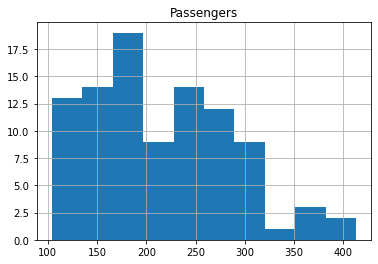

In [62]:
# create a histogram plot
data.hist()
pyplot.show()

<AxesSubplot:ylabel='Density'>

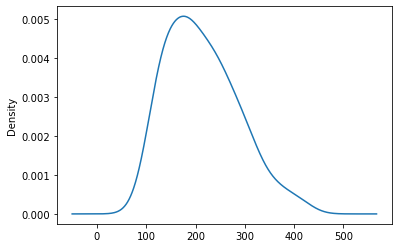

In [63]:
data.Passengers.plot(kind='kde')

In [66]:
#LinePlot

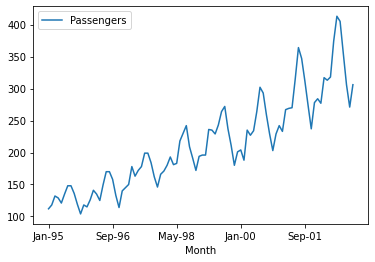

In [78]:
series1 = pd.read_csv('Airlines+Data.csv', header=0, index_col=0)
series1.plot()
pyplot.show()

In [79]:
series1

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [67]:
#Lag plot

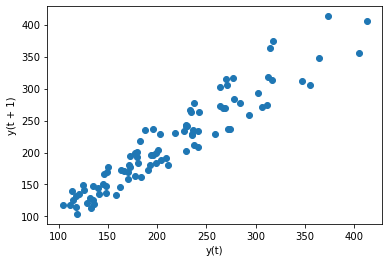

In [68]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series1)
pyplot.show()

In [43]:
# Getting dummy variables 
Months_Dummies = pd.DataFrame(pd.get_dummies(data['Month']))
data_dm = pd.concat([data,Months_Dummies],axis = 1)
data_dm.head()

,Month,Passengers,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,Apr-97,Apr-98,Apr-99,...,Oct-98,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99
0,Jan-95,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apr-95,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,May-95,121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


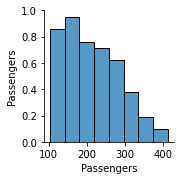

In [46]:
sns.pairplot(data=data)

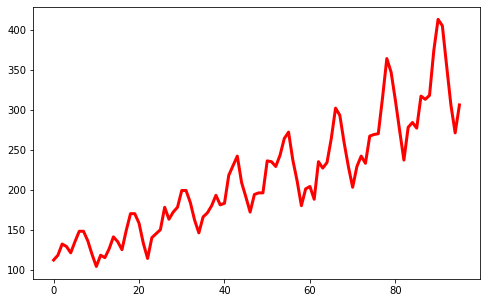

In [47]:
# Lineplot for passengers
plt.figure(figsize=(8,5))
plt.plot(data['Passengers'], color = 'red', linewidth=3)

In [17]:
# Some EDA on Time series data 

In [18]:
# Heat map visualization 

In [71]:
#ACF PLot

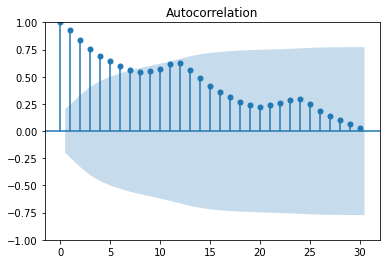

In [72]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series1,lags=30)
pyplot.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


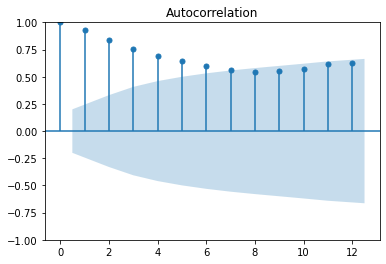

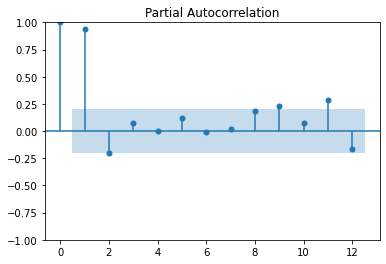

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [81]:
#Plotting Heatmap

In [82]:
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [84]:
data["Date"]=pd.to_datetime(data.Month,format="%b-%y")
data["Months"]=data.Date.dt.strftime("%b")
data["Year"]=data.Date.dt.strftime("%Y")

<AxesSubplot:xlabel='Month', ylabel='Year'>

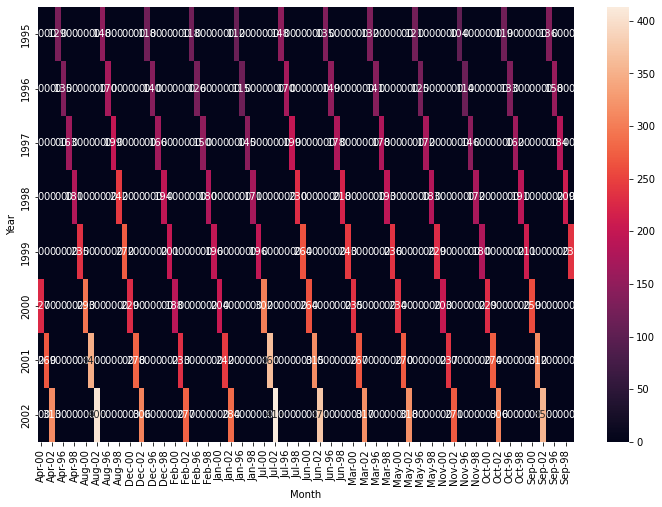

In [86]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

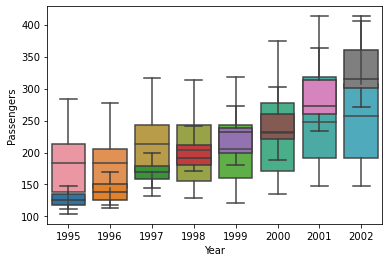

In [87]:
sns.boxplot(x="Months",y="Passengers",data=data)
sns.boxplot(x="Year",y="Passengers",data=data)

In [29]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [30]:
p = data["Month"][0]

In [31]:
p[0:3]

'Jan'

In [33]:
data['months']= 0

In [35]:
#Data Driven Forecasting Methods

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [37]:
#Splitting Data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

In [38]:
Train 

,Month,Passengers,months
0,Jan-95,112,Jan
1,Feb-95,118,Feb
2,Mar-95,132,Mar
3,Apr-95,129,Apr
4,May-95,121,May
...,...,...,...
79,Aug-01,347,Aug
80,Sep-01,312,Sep
81,Oct-01,274,Oct
82,Nov-01,237,Nov


In [39]:
Test

,Month,Passengers,months
84,Jan-02,284,Jan
85,Feb-02,277,Feb
86,Mar-02,317,Mar
87,Apr-02,313,Apr
88,May-02,318,May
89,Jun-02,374,Jun
90,Jul-02,413,Jul
91,Aug-02,405,Aug
92,Sep-02,355,Sep
93,Oct-02,306,Oct


In [40]:
#Moving Average Method

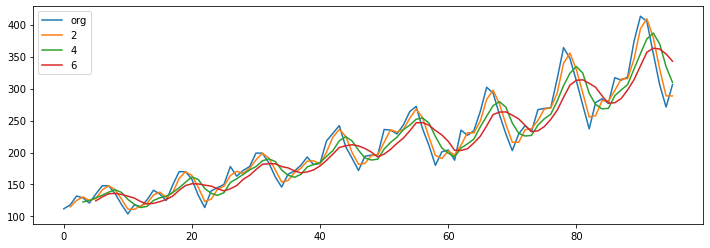

In [63]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,8,2):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [64]:
#Time Series Decomposition plot

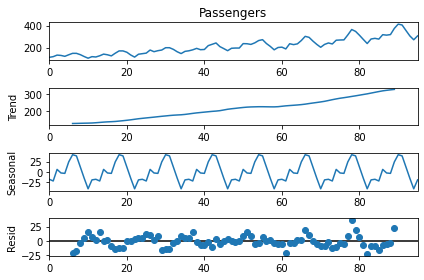

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [74]:
#Evaluation Metric RMSE

In [75]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [76]:
#Simple Exponential Method

In [77]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = RMSE(Test.Passengers, pred_ses)
rmse_ses

68.00674031349644

In [78]:
#Holt Method

In [79]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = RMSE(Test.Passengers, pred_hw)
rmse_hw

58.57384693071804

In [80]:
#Holts winter exponential smoothing with additive seasonality and additive trend

In [81]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add

62.71208217570936

In [82]:
#Holts winter exponential smoothing with additive seasonality and additive trend

In [83]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_mul_add

64.66373828300254

In [84]:
#Model based Forecasting Methods

In [85]:
# Data preprocessing for models
data["t"] = np.arange(1,97)
data["t_squared"] = data["t"]*data["t"]

data["log_psngr"] = np.log(data["Passengers"])

data.head()

,Month,Passengers,months,t,t_squared,log_psngr
0,Jan-95,112,Jan,1,1,4.718499
1,Feb-95,118,Feb,2,4,4.770685
2,Mar-95,132,Mar,3,9,4.882802
3,Apr-95,129,Apr,4,16,4.859812
4,May-95,121,May,5,25,4.795791


In [86]:
# Splitting data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

In [87]:
Train.head()

,Month,Passengers,months,t,t_squared,log_psngr
0,Jan-95,112,Jan,1,1,4.718499
1,Feb-95,118,Feb,2,4,4.770685
2,Mar-95,132,Mar,3,9,4.882802
3,Apr-95,129,Apr,4,16,4.859812
4,May-95,121,May,5,25,4.795791


In [88]:
Test.head()

,Month,Passengers,months,t,t_squared,log_psngr
84,Jan-02,284,Jan,85,7225,5.648974
85,Feb-02,277,Feb,86,7396,5.624018
86,Mar-02,317,Mar,87,7569,5.758902
87,Apr-02,313,Apr,88,7744,5.746203
88,May-02,318,May,89,7921,5.762051


In [89]:
#Linear Model

In [92]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = RMSE(Test['Passengers'], pred_linear)
rmse_linear

53.199236534802715

In [93]:
#Exponential Model

In [94]:
Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp

46.0573611031562

In [95]:
#Quadratic Model

In [100]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_quad_model

48.051888979330975

In [107]:
list = [['Simple Exponential Method',rmse_ses], ['Holt method',rmse_hw],
          ['HW exp smoothing add',rmse_hwe_add_add],['HW exp smoothing mult',rmse_hwe_mul_add],
          ['Linear Mode',rmse_linear],['Exp model',rmse_Exp],['Quad model',rmse_quad_model]]
         

In [108]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.573847
2,HW exp smoothing add,62.712082
3,HW exp smoothing mult,64.663738
4,Linear Mode,53.199237
5,Exp model,46.057361
6,Quad model,48.051889


In [109]:
#Building final model with least RMSE value

In [110]:
data.head()

,Month,Passengers,months,t,t_squared,log_psngr
0,Jan-95,112,Jan,1,1,4.718499
1,Feb-95,118,Feb,2,4,4.770685
2,Mar-95,132,Mar,3,9,4.882802
3,Apr-95,129,Apr,4,16,4.859812
4,May-95,121,May,5,25,4.795791


In [111]:
final_model = smf.ols('Passengers~t+t_squared',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['t','t_squared']]))
rmse_final_model = RMSE(data['Passengers'], pred_final)
rmse_final_model

29.59097162530025

In [112]:
pred_df = pd.DataFrame({'Actual' : data.Passengers, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,112,119.158137
1,118,120.460303
2,132,121.784439
3,129,123.130544
4,121,124.498617
...,...,...
91,405,327.618598
92,355,330.919950
93,306,334.243270
94,271,337.588559
